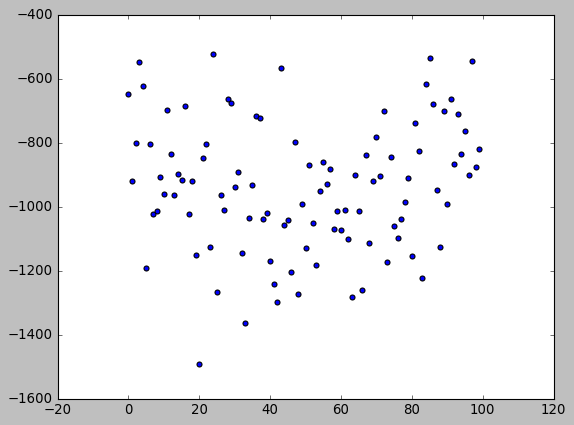

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
np.random.seed(0)
length = 100
mu = 1000
cv = 0.2
sig = mu * cv
x = np.arange(0, length)
y = x - mu + np.random.randn(length)*sig

plt.style.use('classic')
fig, ax = plt.subplots()
ax.scatter(x, y)
plt.show()

In [2]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


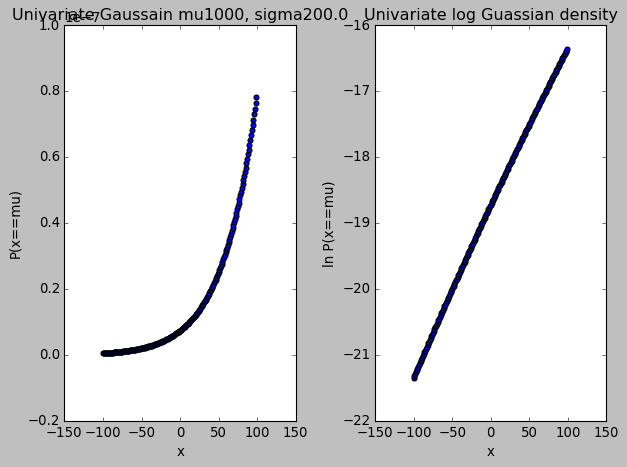

99
99


In [3]:
def stable_div(a, b):
    return np.exp(np.log(a) - np.log(b))

def normal_pdf(y, mu, sigma):
    base = np.sqrt(2* np.pi)*sigma
    base = stable_div(1, base)
    num = -(y - mu)** 2
    den = 2 * sigma**2
    exp = stable_div(num, den)
    return base * np.exp(exp)

def normal_pdf(y, mu, sigma):
    base = np.sqrt(2* np.pi)*sigma
    base = 1 / base
    num = -(y - mu)** 2
    den = 2 * sigma**2
    exp = num / den
    return base * np.exp(exp)

def parabola(x, mu, sigma):
    return -(x-mu)**2 - 10

def mode(x, y):
    return x[np.where(y == max(y))[0][0]]

def plot_density():

    xnorm = np.arange(-length, length)
    ynorm = normal_pdf(xnorm, mu, sig)
    plt.figure(figsize=(8, 6))
    plt.subplot(121)
    plt.title(f'Univariate Gaussain mu{mu}, sigma{sig}')
    plt.xlabel('x')
    plt.ylabel('P(x==mu)')
    plt.scatter(xnorm, ynorm)
    plt.subplot(122)
    plt.title(f'Univariate log Guassian density')
    plt.xlabel('x')
    plt.ylabel('ln P(x==mu)')
    plt.scatter(xnorm, np.log(ynorm))
    plt.tight_layout()
    plt.show()

    print(mode(xnorm, ynorm))
    print(mode(xnorm, np.log(ynorm)))
plot_density()


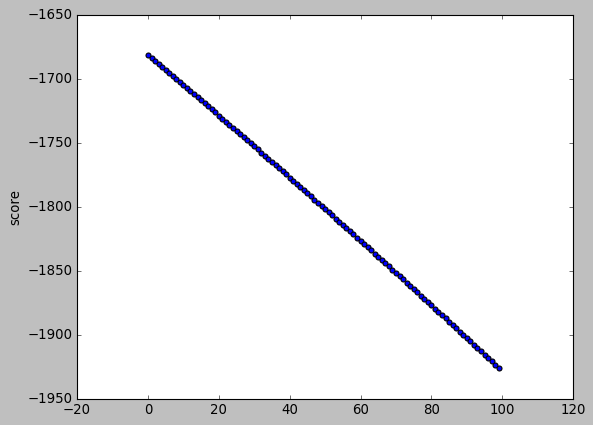

In [4]:
def ull_normal(y, mu, sigma):
    n = len(y)
    tau =  1 / sigma**2
    return  n / 2 * np.log(tau) - tau * (1 / 2) * np.sum((y - mu)**2)
    

from functools import partial
partial_ull_normal = partial(ull_normal, y = y, sigma = sig)

mag = 10
step = 0.5
score = np.array(list(partial_ull_normal(mu = i) for i in x))
plt.ylabel('score')
plt.scatter(x, score)

In [64]:
def MH_MCMC(steps, target, seed, y, mustart, sigstart,
            mu_step_size = 1,
            sigma_step_size = 1):
    np.random.seed(seed)
    chain = np.zeros((steps, 3))
    
    mu = mustart
    sigma = sigstart
    chain[0] = mu, sigma, np.sum(target(y, mu, sigma))
    av = np.mean(y)
    avstd = np.std(y)
    for i in range(1, steps):
        mu = chain[i-1][0]
        sigma = chain[i-1][1]
        mu1 = mu + np.random.uniform(-mu_step_size, mu_step_size) 
        sigma1 = sigma + np.random.uniform(-sigma_step_size, sigma_step_size) 
        
        score1 = np.sum(target(y, mu1, sigma1)) 
        score2 = np.sum(target(y, mu, sigma)) 
        a = min(1, score1 / score2)
        u = np.random.uniform(low=0, high=1)
        if u <= a:
            #Accept the move
            chain[i] = mu1, sigma1, score1
        else:
            #Reject the move
            chain[i] = mu, sigma, score2
        
    return chain
            
        

(array([50., 24., 14.,  4.,  0.,  2.,  3.,  1.,  0.,  2.]),
 array([  0.54278607,  30.04584066,  59.54889525,  89.05194983,
        118.55500442, 148.058059  , 177.56111359, 207.06416817,
        236.56722276, 266.07027735, 295.57333193]),
 <BarContainer object of 10 artists>)

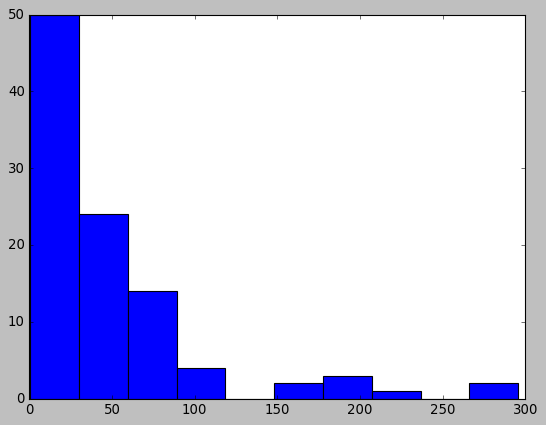

In [65]:
plt.hist(np.random.exponential(np.std(y) / 4, 100))

In [73]:
#The Chain diverges
#Line (all steps were rejected)

y = mu + np.random.randn(length) * sig
#print(f'state mu={mu}, sigma={sig}')
steps = 1000000
mustart = mu * 0.1
sigstart = sig * 5
rseed = 122

In [77]:
chain = MH_MCMC(steps, normal_pdf, rseed, y, 
                mustart, 
                sigstart, mu_step_size = 5,
                sigma_step_size = 5)

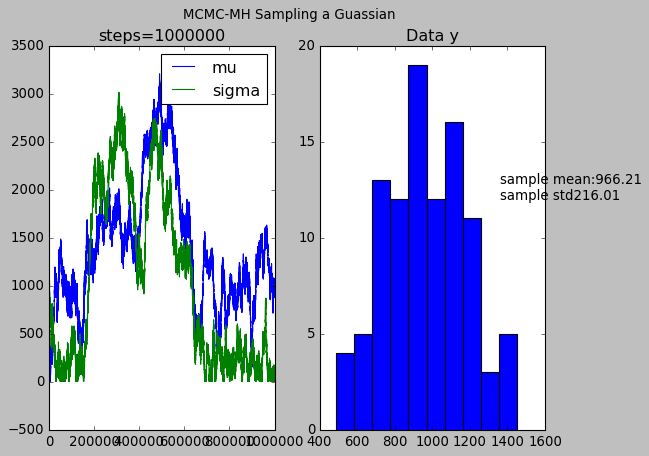

In [79]:
def MCMC_chain_plot(chain, y):
    fig, (a1, a2) = plt.subplots(nrows=1, ncols=2)
    plt.suptitle('MCMC-MH Sampling a Guassian')
    a1.plot(chain)
    a1.set_title(f'steps={steps}')
    a1.legend(['mu', 'sigma'])
    a2.set_title('Data y')
    pretty_std = np.round(np.std(y), decimals=2)
    pretty_mu = np.round(np.mean(y), decimals=2)
    a2.hist(y)
    a2.text(0.8, 0.6, 
            f'sample mean:{pretty_mu}\nsample std{pretty_std}', 
            transform=a2.transAxes)
    plt.show()
MCMC_chain_plot(chain[:, 0:2], y)

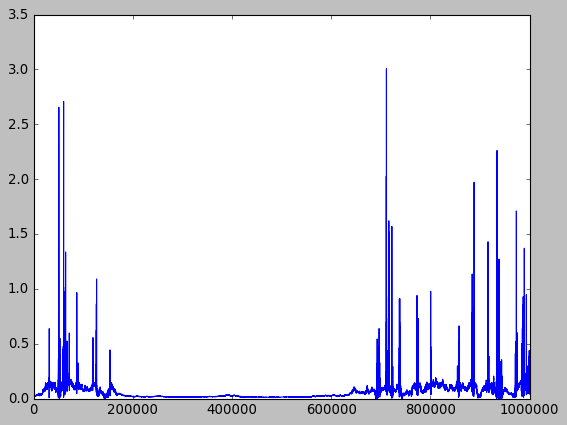

In [80]:
plt.plot(chain[:, 2])

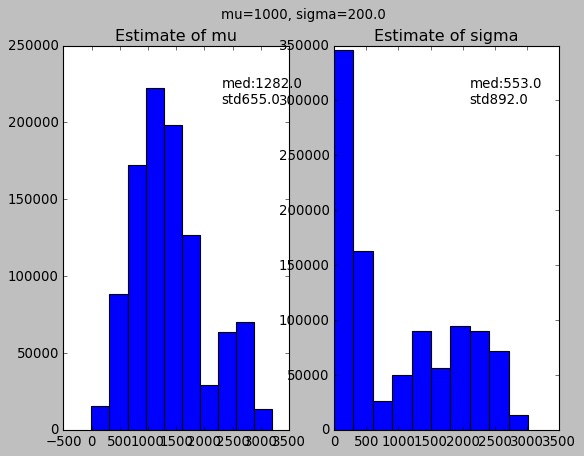

In [81]:
summary_wrapper(chain[:, 0:2])

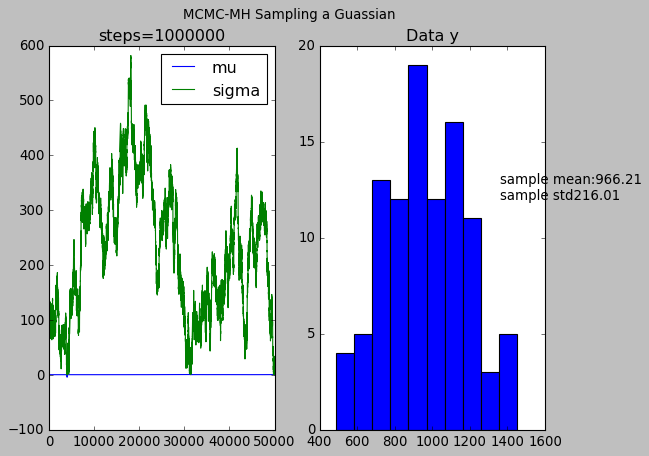

In [94]:
MCMC_chain_plot(chain[0:50000, 0:2], y)

In [55]:
chain = MH_MCMC(steps, lambda x, y, z: normal_pdf(x, y, 300), rseed, y, mustart, sigstart)

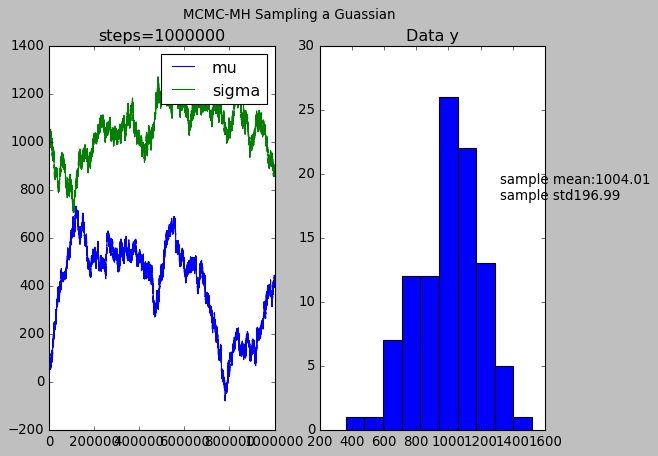

In [57]:
MCMC_chain_plot(chain[:, 0:2], y)

In [58]:
chain = MH_MCMC(steps, lambda x, y, z: normal_pdf(x, 1000, z), rseed, y, mustart, sigstart)


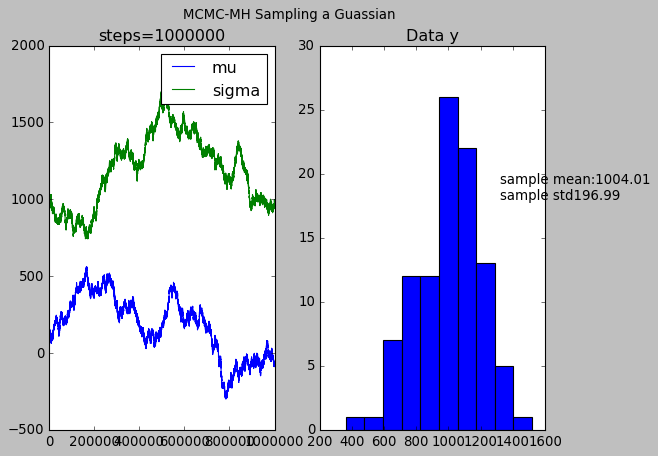

In [59]:
MCMC_chain_plot(chain[:, 0:2], y)

In [63]:
np.sum(normal_pdf(y, 1000, 205)) / np.sum(normal_pdf(y, 1000.25, 205))

0.9999429600383438

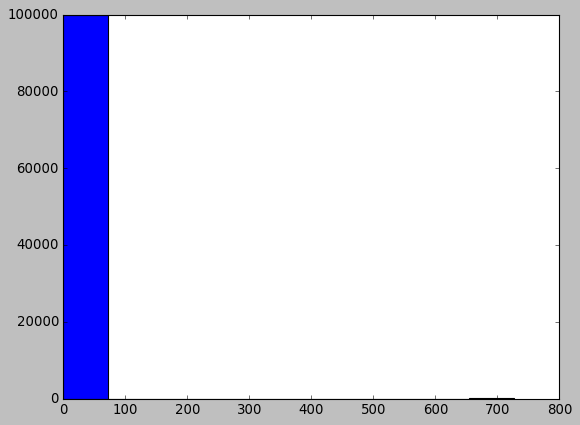

In [16]:
plt.hist(chain[:, 0])
plt.show()

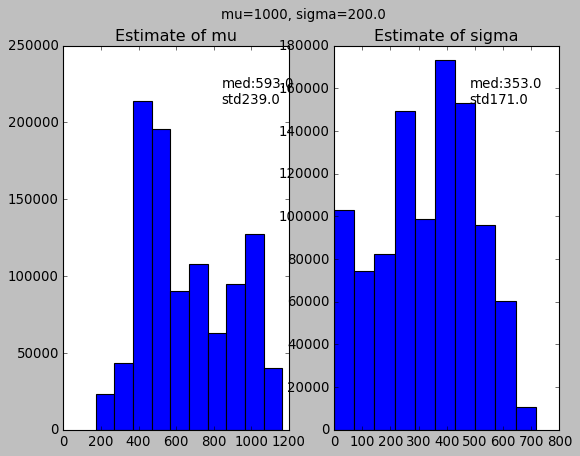

In [26]:
def chain_summary(ax, title, chain, tx, ty):
    ax.hist(chain)
    ax.set_title(title)
    med = np.round(np.median(chain))
    std = np.round(np.std(chain))
    ax.text(tx, ty, f'med:{med}\nstd{std}', transform=ax.transAxes)

def summary_wrapper(chain):
    fig, (a1, a2) = plt.subplots(nrows=1, ncols=2)
    plt.suptitle(f'mu={mu}, sigma={sig}')
    chain_summary(a1, 'Estimate of mu', chain[:, 0], 0.7, 0.85)
    chain_summary(a2, 'Estimate of sigma', chain[:, 1], 0.6, 0.85)

summary_wrapper(chain)

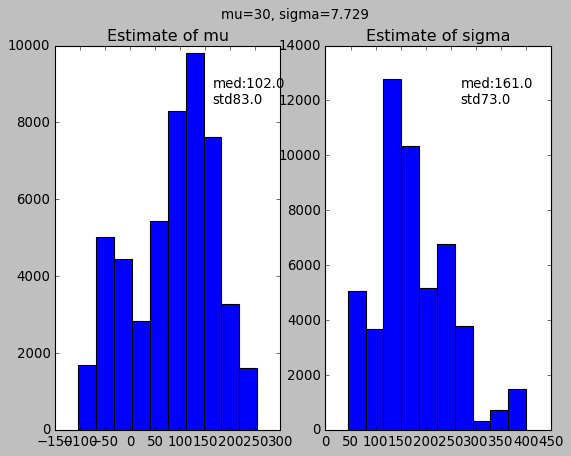

In [14]:
summary_wrapper(chain[steps // 2: , :])

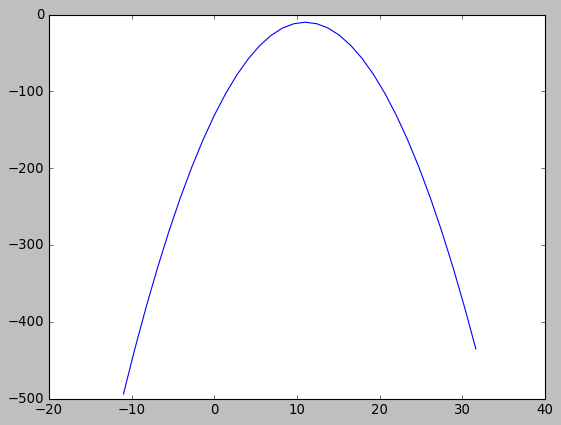

In [41]:
#Test the parabola function
def plot_parabola():
    mu = 11
    x = np.arange(-mu, 3 * mu , mu / 8)
    y = []
    for i in x:
        y.append(np.sum(parabola(i, mu)))
    plt.plot(x, y)
plot_parabola()

200


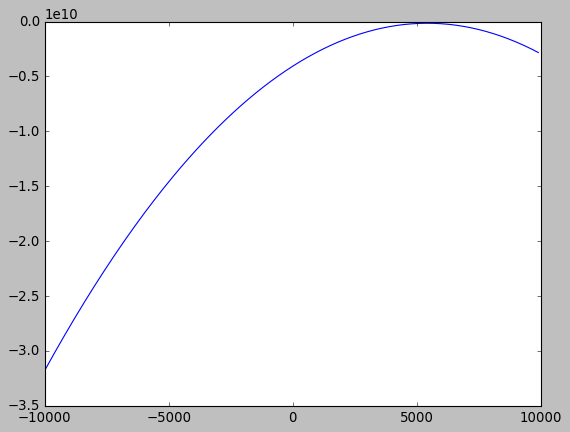

In [44]:
def find_mu_from_parabola():
    np.random.seed(115)
    data = np.random.randn(133)
    mu = 5346
    cv = 0.2
    sigma = cv * mu
    data = mu + sigma * data
    #plt.hist(data)
    mus = []
    xaxis = np.arange(-10000, 10000, 100)
    for mutest in xaxis:
        mus.append(np.sum(parabola(data, mutest)))
    print(len(mus))
    return xaxis, mus
    
xaxis, mus = find_mu_from_parabola()
plt.plot(xaxis, mus)
plt.show()

In [96]:
steps = 10000
y_parabola = 12.34 + np.random.randn(332) * 12.34 * 0.2
chain = MH_MCMC(steps, parabola, rseed, y_parabola, 3, sigstart,
                mu_step_size=1)

In [89]:
min(1, np.divide(-2.1315, -2.0091912))

1

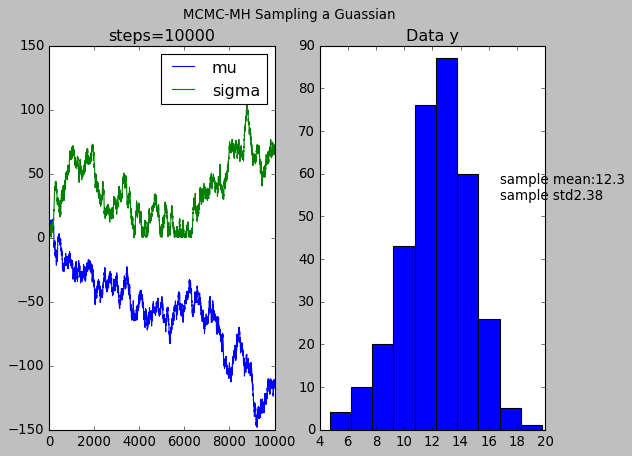

In [98]:
MCMC_chain_plot(chain[:, 0:2], y_parabola)

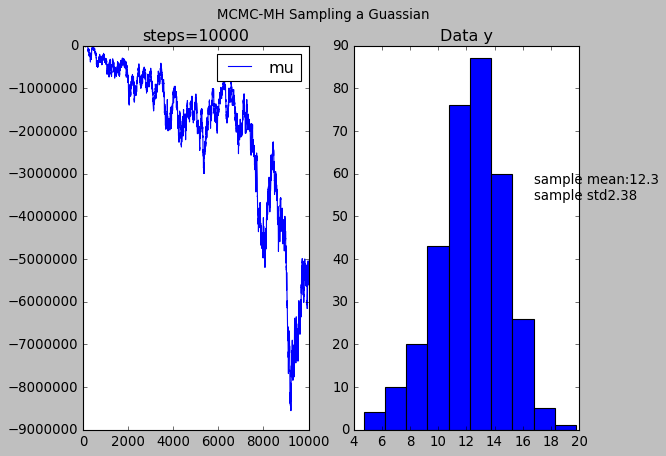

In [99]:
MCMC_chain_plot(chain[:, 2], y_parabola)

In [109]:
ull_normal(y, 10, 2)

-5109.206553951255

In [121]:
sum(normal_pdf(y, 12, 12))

1.3950157305660171

In [59]:
chain = MH_MCMC(1000000, parabola, rseed, y_parabola, 1000, 100)

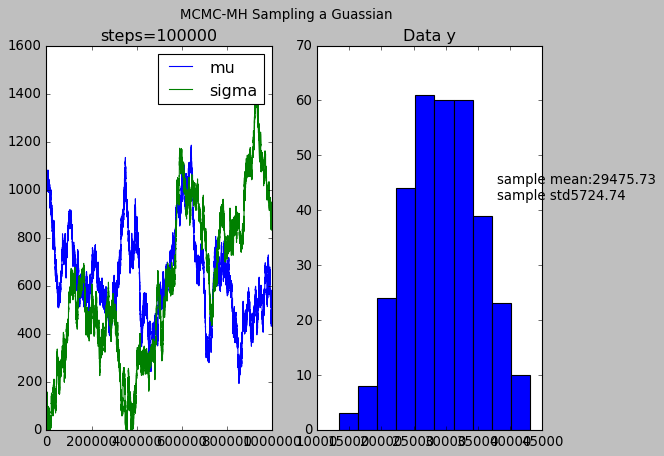

In [60]:
MCMC_chain_plot(chain, y_parabola)

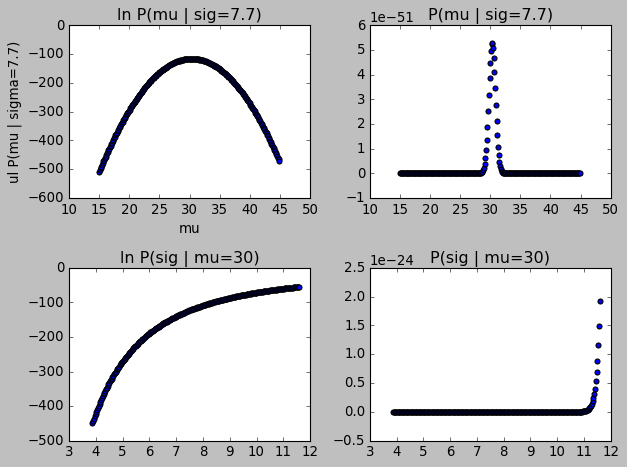

In [92]:
from functools import partial
y = mu + np.random.randn(length) * sig
width = 0.1

def plot_likelihood_func(mu, sig):
    pretty_sigma = np.round(sig, decimals=1)
    pretty_mu = np.round(mu, decimals=1)
    y = mu + np.random.randn(length) * sig
    width = 0.5
    #plt.style.use('ggplot')
    mu_guess = np.arange(mu - width * mu, mu +  width *mu, width * mu / 128)
    sig_guess = np.arange(sig - width * sig, sig +  width *sig, width * sig / 128)
    partial_ull_normal = partial(ull_normal, y = y, sigma = sig)
    partial_ull_sig = partial(ull_normal, y = y, mu = mu)


    fig, ax = plt.subplots(nrows=2, ncols=2)
    a1, a2, a3, a4 = ax[0, 0], ax[0, 1], ax[1, 0], ax[1, 1]
    mag = 10
    step = 0.5
    score = np.array(list(partial_ull_normal(mu = i) for i in mu_guess))
    a1.scatter(mu_guess, score)
    a1.set_title(f'ln P(mu | sig={pretty_sigma})')
    a1.set_ylabel(f'ul P(mu | sigma={pretty_sigma})')
    a1.set_xlabel(f'mu')
    a2.set_title(f'P(mu | sig={pretty_sigma})')
    a2.scatter(mu_guess, np.exp(score))

    score = np.array(list(partial_ull_sig(sigma = i) for i in sig_guess))

    a3.scatter(sig_guess, score)
    a3.set_title(f'ln P(sig | mu={pretty_mu})')
    a4.set_title(f'P(sig | mu={pretty_mu})')
    a4.scatter(sig_guess, np.exp(score))
    plt.tight_layout()
    plt.show()

plot_likelihood_func(mu, sig)

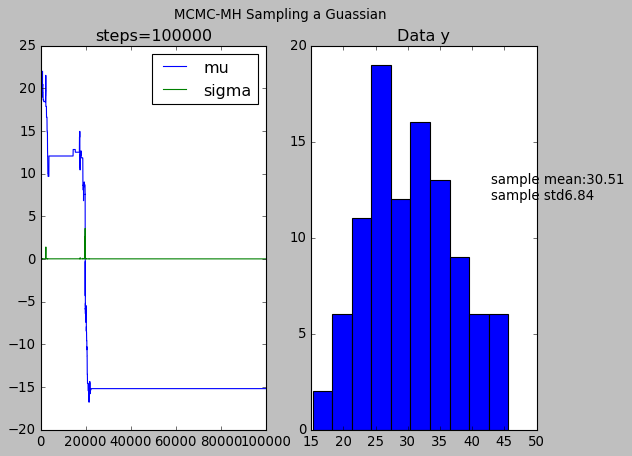

In [93]:
#The Chain diverges
#y = mu + np.random.randn(length) * sig
#print(f'state mu={mu}, sigma={sig}')
chain = MH_MCMC(steps, ull_normal, rseed, y, mustart, sigstart)

MCMC_chain_plot(chain, y)

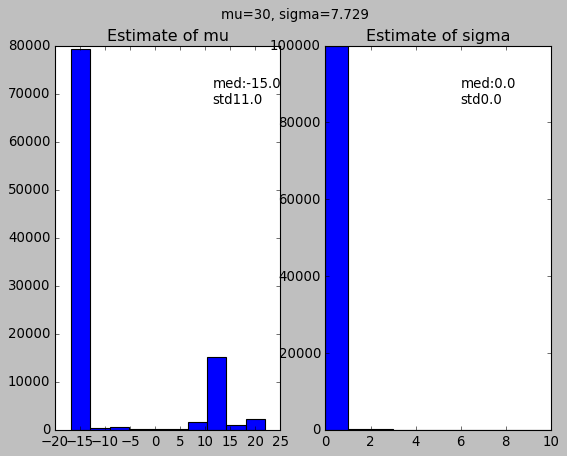

In [94]:
summary_wrapper(chain)

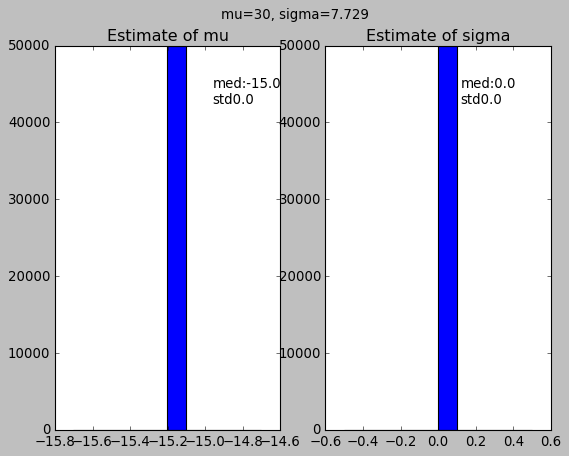

In [95]:
summary_wrapper(chain[steps // 2: , :])

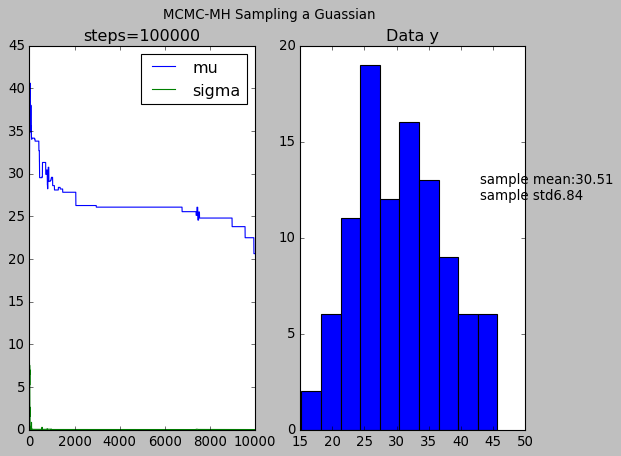

In [96]:
#The Chain diverges
#y = mu + np.random.randn(length) * sig
#print(f'state mu={mu}, sigma={sig}')
chain = MH_MCMC(10000, ull_normal, rseed, y, 30, 8)

MCMC_chain_plot(chain, y)

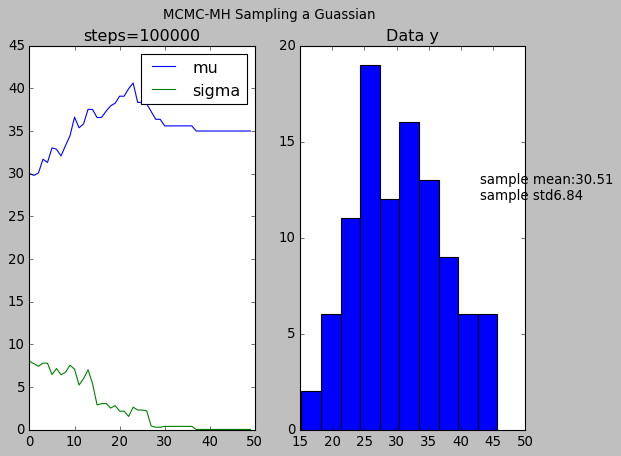

In [97]:
MCMC_chain_plot(chain[0: length // 2], y)

In [98]:
def test_div():
    target = ull_normal
    mu1 = 1.1
    sigma1 = 1.1
    mu = 1
    sigma = 1
    s1 = np.sum(target(y, mu1, sigma1))
    s2 = np.sum(target(y, mu, sigma))
    print(f's1={s1}, s2={s2}')
    A = stable_div(s1 , s2)
    print(A)
    print(f's1 / s2 = {s1 / s2}')
    print(f'np.divide(s1, s2)={np.divide(s1, s2)}')
    return A

A = test_div()

s1=-75332.97163858378, s2=-91741.79413236128
nan
s1 / s2 = 0.8211412513897044
np.divide(s1, s2)=0.8211412513897044


/tmp/ipykernel_1052446/3757538518.py:2: RuntimeWarning: invalid value encountered in log
  return np.exp(np.log(a) - np.log(b))


/tmp/ipykernel_1052446/2924083380.py:3: RuntimeWarning: divide by zero encountered in double_scalars
  tau =  1 / sigma**2
/tmp/ipykernel_1052446/2924083380.py:4: RuntimeWarning: invalid value encountered in double_scalars
  return  n / 2 * np.log(tau) - tau * (1 / 2) * np.sum((y - mu)**2)


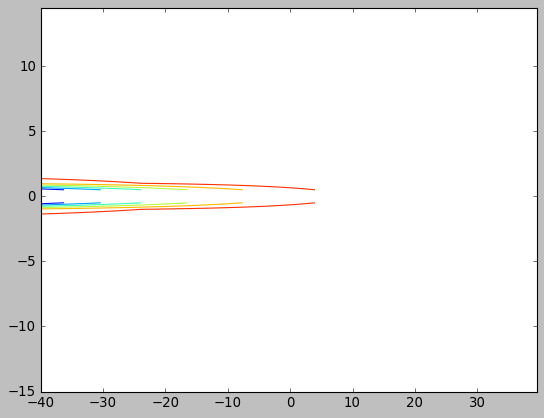

In [140]:
a = np.arange(-40, 40, 0.5)
b = np.arange(-15, 15, 0.5)
aa, bb = np.meshgrid(a, b)
z = np.random.randn(len(a), len(b))
for i, va in enumerate(a):
    for j, vb in enumerate(b):
        z[i, j] = ull_normal(y, va, vb)

plt.contour(aa, bb, z.T)


In [141]:
?plt.contour